In [50]:
import sqlite3
import pandas
conn = sqlite3.connect('gbif.db', check_same_thread=False)
from tqdm.notebook import tqdm
import numpy
from neo4j import GraphDatabase


In [61]:
conn.execute(
    """DROP TABLE IF EXISTS reference"""
)
conn.commit()

In [2]:
filepath = r'C:\Users\niki\Data\Ceebios\backbone-current\Taxon.tsv'
taxon = pandas.read_table(filepath)
taxon.to_sql('taxon',conn)

In [4]:
filepath = r'C:\Users\niki\Data\Ceebios\backbone-current\VernacularName.tsv'
vernacular = pandas.read_table(filepath)
vernacular.to_sql('vernacular',conn)

c:\users\niki\environments\ceebios\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [239]:
filepath = r'C:\Users\niki\Data\Ceebios\backbone-current\Distribution.tsv'
distribution = pandas.read_table(filepath)
#distribution.to_sql('distribution',conn)

c:\users\niki\environments\ceebios\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [229]:
filepath = r'C:\Users\niki\Data\Ceebios\backbone-current\Multimedia.tsv'
multimedia = pandas.read_table(filepath)
#multimedia.to_sql('multimedia',conn)

c:\users\niki\environments\ceebios\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (4,6,7,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [59]:
filepath = r'C:\Users\niki\Data\Ceebios\backbone-current\Reference.tsv'
reference = pandas.read_table(filepath)
reference.to_sql('reference',conn)

c:\users\niki\environments\ceebios\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [60]:
reference.head()


,taxonID,bibliographicCitation,identifier,references,source
0,2227518,CoL2006,NaN,NaN,The Interim Register of Marine and Nonmarine G...
1,2227518,"De Grave, S., Pentcheff, N.D., Ahyong, S.T., C...",NaN,NaN,The Interim Register of Marine and Nonmarine G...
2,2227518,"De Grave, S., Pentcheff, N.D., Ahyong, S.T., C...",NaN,NaN,The Interim Register of Marine and Nonmarine G...
3,2227518,"De Grave, S., Pentcheff, N.D., Ahyong, S.T., C...",NaN,NaN,The Interim Register of Marine and Nonmarine G...
4,2227518,Nomenclator Zoologicus (authority adjusted),NaN,NaN,The Interim Register of Marine and Nonmarine G...


In [8]:
taxon.head()

,taxonID,datasetID,parentNameUsageID,acceptedNameUsageID,originalNameUsageID,scientificName,scientificNameAuthorship,canonicalName,genericName,specificEpithet,...,namePublishedIn,taxonomicStatus,nomenclaturalStatus,taxonRemarks,kingdom,phylum,class,order,family,genus
0,1162096,7ddf754f-d193-4cc9-b351-99906754a03b,1162079.0,NaN,NaN,"Eopenthes deceptor Sharp, 1908","Sharp, 1908",Eopenthes deceptor,Eopenthes,deceptor,...,NaN,accepted,NaN,NaN,Animalia,Arthropoda,Insecta,Coleoptera,Elateridae,Eopenthes
1,1162114,7ddf754f-d193-4cc9-b351-99906754a03b,1162079.0,NaN,NaN,"Eopenthes basalis Sharp, 1885","Sharp, 1885",Eopenthes basalis,Eopenthes,basalis,...,NaN,accepted,NaN,NaN,Animalia,Arthropoda,Insecta,Coleoptera,Elateridae,Eopenthes
2,1741665,7ddf754f-d193-4cc9-b351-99906754a03b,1741585.0,NaN,NaN,"Cochylis psychrasema Meyrick, 1937","Meyrick, 1937",Cochylis psychrasema,Cochylis,psychrasema,...,NaN,accepted,NaN,NaN,Animalia,Arthropoda,Insecta,Lepidoptera,Tortricidae,Cochylis
3,1741670,7ddf754f-d193-4cc9-b351-99906754a03b,1741585.0,NaN,NaN,"Cochylis sagittigera Razowski & Becker, 1983","Razowski & Becker, 1983",Cochylis sagittigera,Cochylis,sagittigera,...,NaN,accepted,NaN,NaN,Animalia,Arthropoda,Insecta,Lepidoptera,Tortricidae,Cochylis
4,1782495,7ddf754f-d193-4cc9-b351-99906754a03b,1782493.0,NaN,NaN,"Baputa dichroa Kirsch, 1877","Kirsch, 1877",Baputa dichroa,Baputa,dichroa,...,NaN,accepted,NaN,NaN,Animalia,Arthropoda,Insecta,Lepidoptera,Noctuidae,Baputa


In [13]:
species = taxon[taxon['taxonRank'].isin(['form','variety','subspecies','species'])]

In [57]:
species = species[~species['canonicalName'].isna()]
species = species[species['taxonomicStatus']=='accepted']


In [58]:
groups = species.groupby(['genus']).count()

In [59]:
data = groups['taxonID'].values

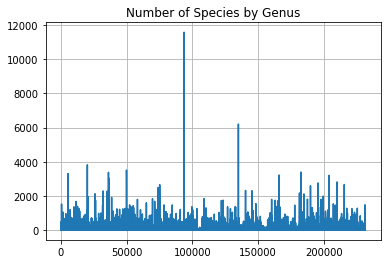

In [61]:
plt.plot(data)
plt.grid()
plt.title('Number of Species by Genus');

In [62]:
np.mean(data)

11.50714714351706

In [63]:
np.std(data)

60.23432892005626

In [56]:
taxon['taxonomicStatus'].unique()

array(['accepted', 'doubtful', 'synonym', 'misapplied',
       'homotypic synonym', 'heterotypic synonym', 'proparte synonym'],
      dtype=object)

## Neo4j

In [164]:
thisdata = [taxon[taxon['parentNameUsageID']==4490]]
ok = True
while ok:
    ut = thisdata[-1]['taxonID'].unique()
    subdata = [taxon[taxon['parentNameUsageID']==t] for t in ut]
    if len(subdata)>0:
        subdata = pandas.concat(subdata,axis=0).drop_duplicates()
        thisdata.append(subdata)
    else:
        ok = False


In [165]:
thisdata.append(taxon[taxon['taxonID']==4490])
thisdata = pandas.concat(thisdata,axis=0)
thisdata = thisdata.drop_duplicates()
thisdata = thisdata[~thisdata['canonicalName'].isna()]
thisdata = thisdata[thisdata['taxonomicStatus']=='accepted']

thisdata.shape

(2282, 23)

In [166]:
def get_nodes(df):
    nodes = []
    for i in range(df.shape[0]):
        idf = df.iloc[i]
        nodes.append({'name':idf['canonicalName'], 'taxon':idf['taxonID'], 'rank':idf['taxonRank']})
    return nodes

In [169]:
def get_edges(df):
    taxons = df['taxonID'].unique().astype(int)
    edges = []
    for i in range(df.shape[0]):
        idf = df.iloc[i]
        parentid = idf['parentNameUsageID'].astype(int)
        childid = idf['taxonID'].astype(int)
        if parentid in taxons:            
            edges.append([childid,parentid])
    return edges

In [170]:
edges = get_edges(thisdata)
nodes = get_nodes(thisdata)

In [171]:
nodes[:2]

[{'name': 'Apoica', 'taxon': 1310488, 'rank': 'genus'},
 {'name': 'Nectarinella', 'taxon': 1311744, 'rank': 'genus'}]

In [172]:
edges[:2]

[[1310488, 4490], [1311744, 4490]]

In [173]:
def create_node(tx, name, taxon, rank):
    return tx.run(
        "CREATE (a:Entity {name: $name, taxon:$taxon, rank:$rank}) RETURN id(a)", 
        name=name, 
        taxon=taxon, 
        rank=rank
    ).single().value()


def create_edge(tx, t1,t2):
        tx.run('''MATCH (a: Entity)
                MATCH (b: Entity)
                WHERE a.taxon = $t1 AND b.taxon =$t2
                CREATE (a)-[:HAS_CHILD]->(b)''',
                t1=t2, t2=t1)
        tx.run('''MATCH (a: Entity)
                MATCH (b: Entity)
                WHERE a.taxon = $t1 AND b.taxon =$t2
                CREATE (a)-[:HAS_PARENT]->(b)''',
                t1=t1, t2=t2)            

In [45]:
from neo4j import GraphDatabase

db_params = {
    "uri":"bolt://localhost:7687",
    "user":"neo4j",
    "password":"treeoflife"
}

driver = GraphDatabase.driver(
    db_params['uri'], 
    auth=(db_params['user'], 
    db_params['password'])
)


In [177]:
with driver.session() as session:
    for node in tqdm(nodes, desc='NODES '):
        session.write_transaction(create_node, node['name'], node['taxon'].astype('str'), node['rank'])
    for edge in tqdm(edges, desc ="EDGES "):
        session.write_transaction(create_edge, edge[0].astype(str), edge[1].astype(str))
driver.close()

EDGES :   0%|          | 0/2185 [00:00<?, ?it/s]

In [224]:
def add_lang(tx,en,fr, taxon):
    if en:
        tx.run('''MATCH (a: Entity {taxon:$tax}) set a.en=$name return a''', name=en, tax=taxon)
    if fr:
        tx.run('''MATCH (a: Entity {taxon:$tax}) set a.fr=$name return a''', name=fr, tax=taxon)
        
with driver.session() as session:
    for i in tqdm(range(thisdata.shape[0]), desc ="Vernaculars "):
        idf = thisdata.iloc[i]
        taxon = idf['taxonID'].astype('str')
        V = vernacular[vernacular['taxonID']==idf['taxonID']]
        if ('en' in V['language'].values) or ('fr' in V['language'].values):
            fr =  V['vernacularName'][V['language']=='fr'].values[0] if 'fr' in V['language'].values else ''
            en =  V['vernacularName'][V['language']=='en'].values[0] if 'en' in V['language'].values else ''
            session.write_transaction(add_lang, en,fr,taxon)

driver.close()
        

Vernaculars :   0%|          | 0/2282 [00:00<?, ?it/s]

In [234]:
multimedia[multimedia['taxonID']==4490]['identifier'].values

array(['https://zenodo.org/record/2637328/files/figure.png'], dtype=object)

In [237]:
def add_pic(tx,pic, taxon):
    tx.run('''MATCH (a: Entity {taxon:$tax}) set a.picture=$pic return a''', pic=pic, tax=taxon)
        
with driver.session() as session:
    for i in tqdm(range(thisdata.shape[0]), desc ="Vernaculars "):
        idf = thisdata.iloc[i]
        taxon = idf['taxonID'].astype('str')
        V = multimedia[multimedia['taxonID']==idf['taxonID']]
        if V.shape[0]>0:
            pic = V['identifier'].values[0]
            session.write_transaction(add_pic, pic,taxon)

driver.close()

Vernaculars :   0%|          | 0/2282 [00:00<?, ?it/s]

In [245]:
distribution[distribution['taxonID'].isin(thisdata['taxonID'].unique())]

,taxonID,locationID,locality,country,countryCode,locationRemarks,establishmentMeans,lifeStage,occurrenceStatus,threatStatus,source
23029,1329840,ISO:NO,NaN,Norway,NO,NaN,NaN,NaN,NaN,NaN,Norwegian Red List 2015
24731,1310164,CO:70,Bosque | Agro-ecosistema,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Listado de avispas sociales (Vespidae: Polisti...
24732,1310493,CO:70,Bosque,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Listado de avispas sociales (Vespidae: Polisti...
24735,1309871,CO:70,Bosque,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Listado de avispas sociales (Vespidae: Polisti...
24736,1310157,CO:70,Bosque | Agro-ecosistema | Zona urbana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Listado de avispas sociales (Vespidae: Polisti...
...,...,...,...,...,...,...,...,...,...,...,...
2552767,1311824,ISO:NO,NaN,Norway,NO,NaN,NaN,NaN,present,NaN,Artsnavnebasen
2552768,1311795,ISO:NO,NaN,Norway,NO,NaN,NaN,NaN,present,NaN,Artsnavnebasen
2552770,1311816,ISO:NO,NaN,Norway,NO,NaN,NaN,NaN,present,NaN,Artsnavnebasen
2552771,1311676,ISO:NO,NaN,Norway,NO,NaN,NaN,NaN,present,NaN,Artsnavnebasen


## Papers

In [27]:
import sys
import os
import gzip
import json
import pandas
loc = r"\\wsl$\Ubuntu-20.04\home\niki\Data\ceebios"
sys.path.insert(0, loc)

In [5]:
gz = "s2-corpus-000.gz"

In [10]:
f = gzip.open(os.path.join(loc,gz),'r')
content = f.read()

In [18]:
D = content.decode('utf-8')

In [42]:
Js = []
for J in D.split('\n'):
    if J:
        Js.append(json.loads(J))

In [43]:
articles = pandas.DataFrame(Js)

In [44]:
articles.head()

,id,title,paperAbstract,authors,inCitations,outCitations,year,s2Url,sources,pdfUrls,...,journalName,journalVolume,journalPages,doi,doiUrl,pmid,fieldsOfStudy,magId,s2PdfUrl,entities
0,33b237709dbd53953a750355115b57ccb6690da1,USING PHOTO IMAGES TO DETERMINE THE GEOMETRIC ...,,"[{'name': 'E Popov', 'ids': ['144112922']}, {...",[],[],2019.0,https://semanticscholar.org/paper/33b237709dbd...,[],[],...,,19,45-54,10.14529/build190307,https://doi.org/10.14529/build190307,,[Computer Science],3000193832,,[]
1,062e9c7579adc73129e1198671d05905f07d4ab5,Clinical or Industrial Pharmacy? Case Studies ...,Automated medication dispensing systems for ho...,"[{'name': 'J Novek', 'ids': ['47586327']}]","[59a8feb7cfbc50c64152b116dba1dad3412cd104, 799...","[1723e0346fc1de5bb835c71c66388c1c128a1abe, ddc...",1998.0,https://semanticscholar.org/paper/062e9c7579ad...,[Medline],[],...,International Journal of Health Services,28,445 - 465,10.2190/W2BT-FGXQ-QL0G-YNL9,https://doi.org/10.2190/W2BT-FGXQ-QL0G-YNL9,9711475,[Medicine],1988383910,,[]
2,771723e7e2d9ed97d09442086553b726f0dd6657,Noncoronary and coronary atherothrombotic plaq...,"In the future, the use of imaging methods to q...","[{'name': 'Zahi A Fayad', 'ids': ['1886137']}]","[1b595ab60dbdaad1a7096859340bb515eb5d2476, 362...","[e3718ee0bafe60b684e71e72345ce0064cb5046e, 8ee...",2002.0,https://semanticscholar.org/paper/771723e7e2d9...,[Medline],[],...,Neuroimaging clinics of North America,12 3,\n 461-71\n,10.1016/S1052-5149(02)00023-0,https://doi.org/10.1016/S1052-5149%2802%2900023-0,12486833,[Medicine],1983175018,,[]
3,263f70167ba7def67a2843ffc30c80a0b9b3f617,국어 명사구 접속의 연구,,"[{'name': '최재희', 'ids': ['115087709']}]",[],[],1985.0,https://semanticscholar.org/paper/263f70167ba7...,[],[],...,,,,,,,[],2291560164,,[]
4,9ea1148fa657103879ef7ed9a5b716be48ee13a4,Who'll Take My Place : When I'm Gone,,"[{'name': 'Billy Fazioli', 'ids': ['146257415...",[],[],2018.0,https://semanticscholar.org/paper/9ea1148fa657...,[],[https://digitalcommons.library.umaine.edu/cgi...,...,,,,,,,[Art],1489188979,,[]


In [58]:
def create_article(tx,id,title,abstract,doiUrl,s2Url):
    return tx.run(
        "CREATE (a:Article {id: $id, title:$title, abstract:$abstract, doiUrl:$doiUrl, s2Url:$s2Url}) RETURN id(a)", 
        id=id, 
        title=title, 
        abstract=abstract,
        doiUrl=doiUrl, 
        s2Url=s2Url
    ).single().value()



In [59]:
with driver.session() as session:
    for i in tqdm(range(len(Js)), desc ="Articles "):
        id = Js[i].get('id')
        title = Js[i].get('title')
        abstract = Js[i].get('paperAbstract')
        doiUrl = Js[i].get('doiUrl')
        s2Url = Js[i].get('s2Url')
        if title and abstract:
            session.write_transaction(create_article, id,title,abstract,doiUrl,s2Url)

driver.close()

Articles :   0%|          | 0/31838 [00:00<?, ?it/s]